# Validation of the 2D ray-rectangle intersection calculation

## imports

In [1]:
import sys
sys.path.insert(0, '..')
import pymatcal
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Read in the configuration, should be tested by `get_config.ipynb`

In [2]:
config = pymatcal.get_config('test-config.yml')
print(config['dist'])

60.0


## Define point $A$ in FOV for debugging

In [3]:
pointA = np.array([0, 0, 0])
angle_deg = 10

## Setup subdivisions and $p_A p_B$ pairs

In [4]:
det_subdivs = pymatcal.get_det_subdivs(
    config['active det'][0], config['det nsub'])
img_subdivs = pymatcal.get_img_subdivs(config['mmpvx'], config['img nsub'])

pAs = img_subdivs['coords']+pointA
# pBs = det_subdivs['coords']+np.array([config['dist'], 0, 0])
pBs = det_subdivs['coords']

pAs = pymatcal.coord_transform(
    pymatcal.get_mtransform(angle_deg, -config['dist'], 0.1), pAs)
abpairs = pymatcal.get_AB_pairs(pAs, pBs)

0.17453292519943295


In [5]:
intersects = pymatcal.get_intersects_2d(config['det geoms'],abpairs)

(4, 2, 64)


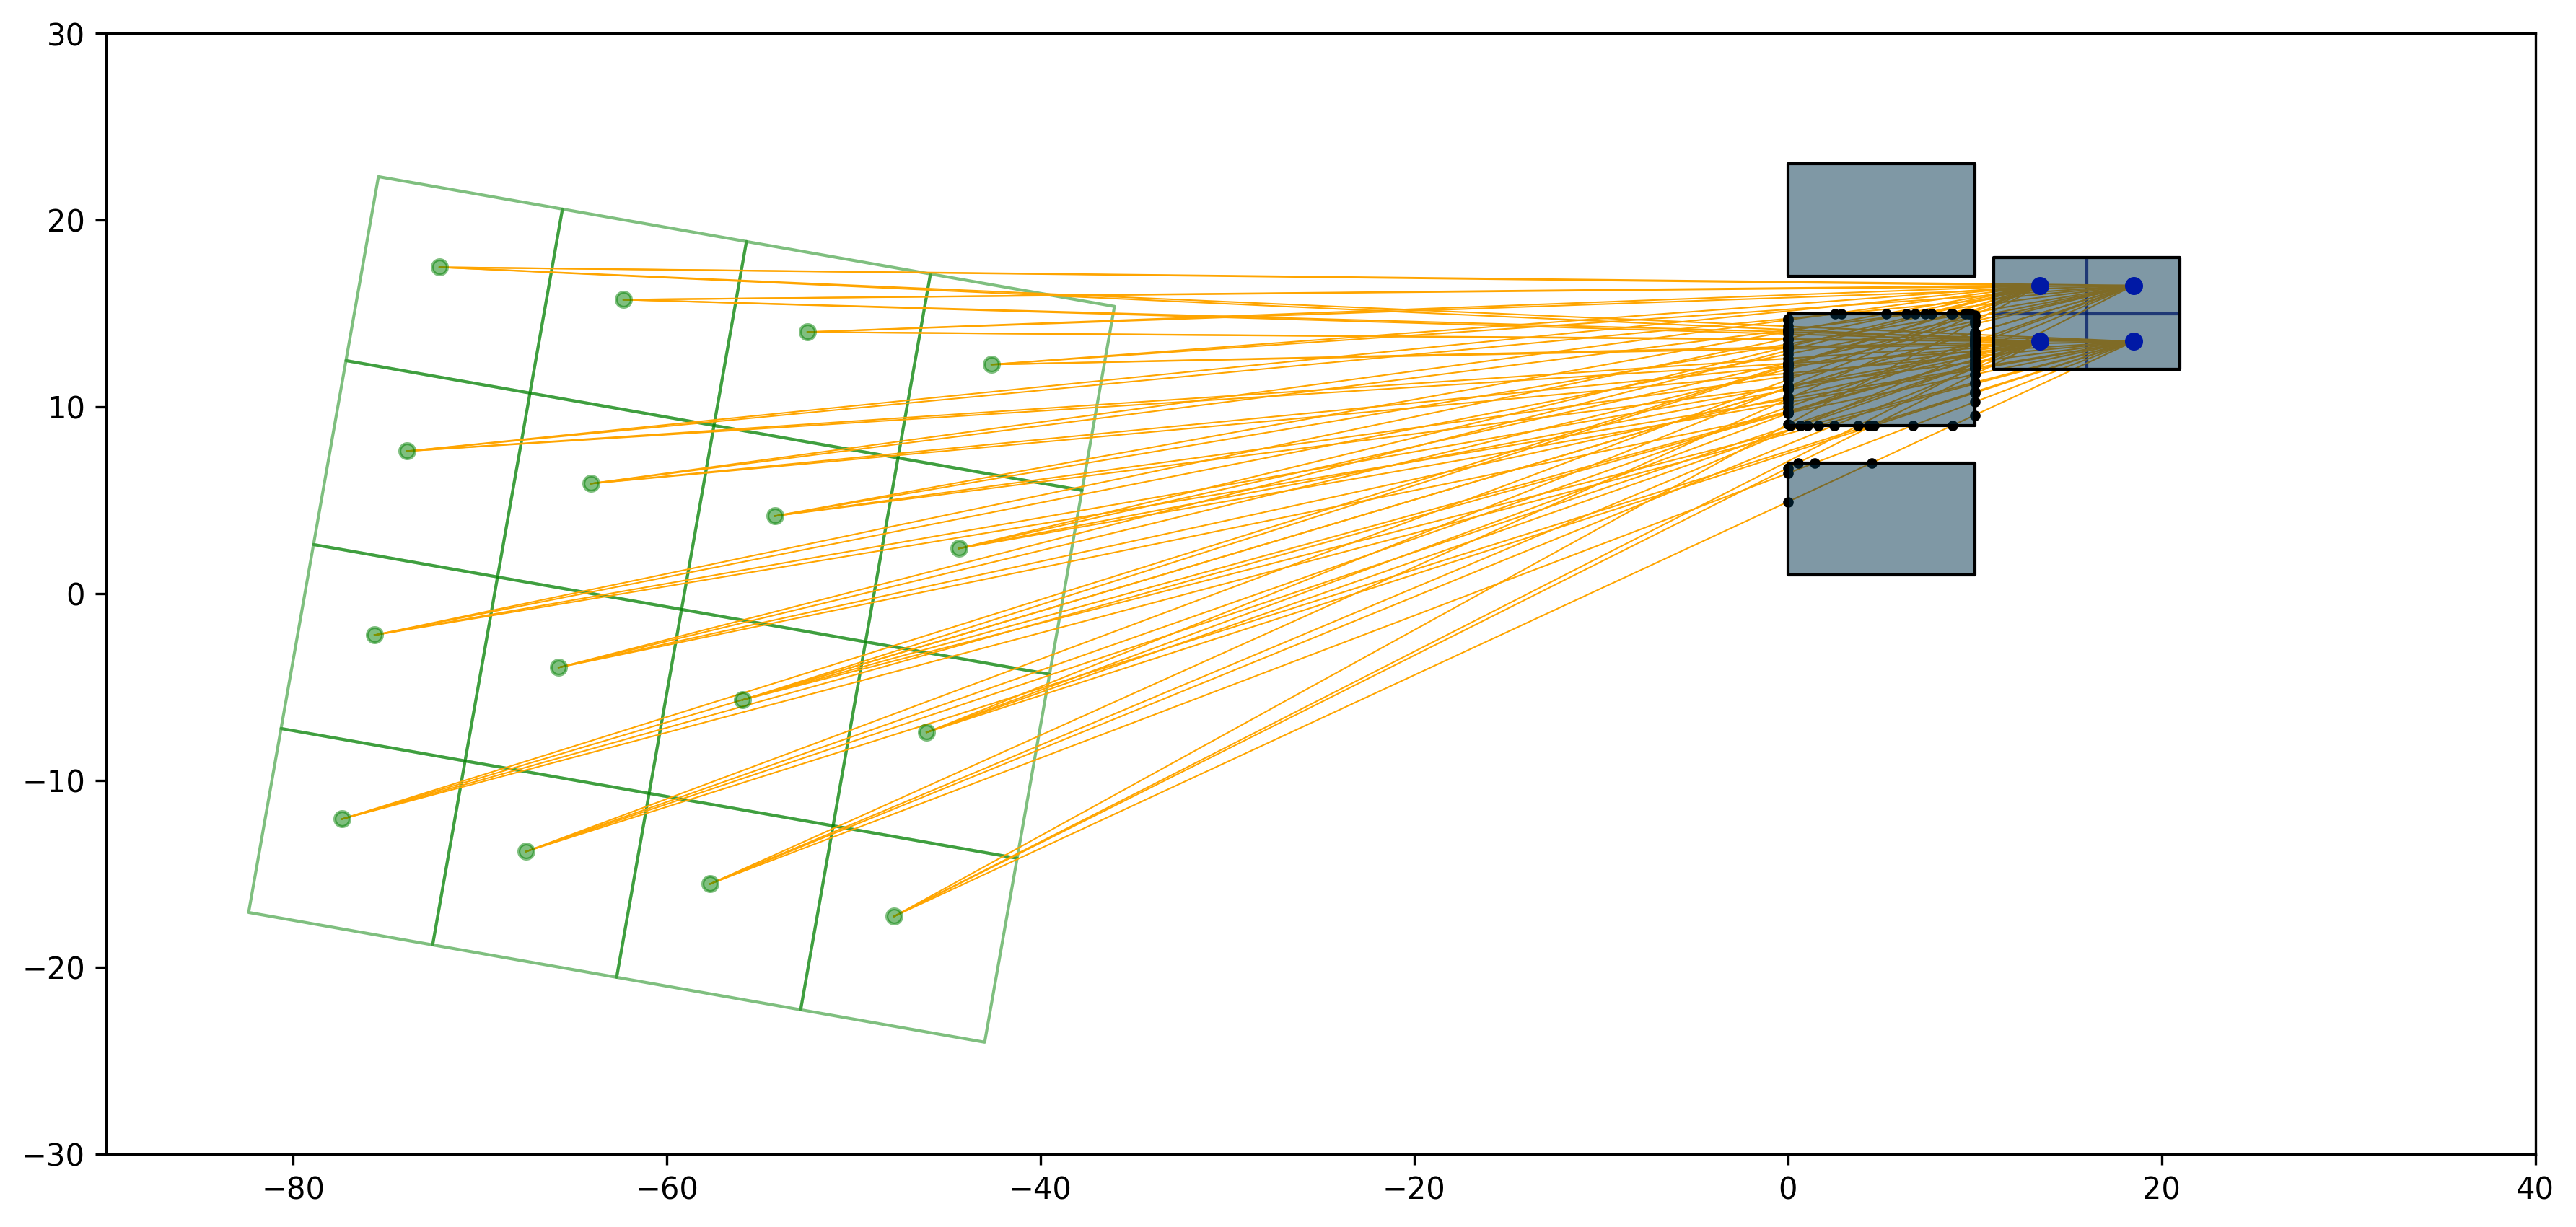

In [6]:
cuboid = config['active det'][0]
det_subdiv_list = [mpl.patches.Rectangle(
    xy[:2]-det_subdivs['incs'][:2]*0.5, det_subdivs['incs'][0], det_subdivs['incs'][1]) for xy in pBs]
subdiv_inc = np.array([config['mmpvx'][0]/config['img nsub']
                      [0], config['mmpvx'][1]/config['img nsub'][1]])
img_subdiv_list = [mpl.patches.Rectangle(
    xy-subdiv_inc*0.5, subdiv_inc[0], subdiv_inc[1], angle=-angle_deg) for xy in pAs[:, :2]]
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
pc = mpl.collections.PatchCollection(
    img_subdiv_list, ec=(0, 0.5, 0, 0.5), fc='none')
pc1 = mpl.collections.PatchCollection(
    det_subdiv_list, ec=(0, 0, 0.5, 0.5), fc='none')
nb = pBs.shape[0]
na = pAs.shape[0]
color = plt.cm.rainbow(np.linspace(0, 1, nb))
idx = 0
# for pair in abpairs[np.all(ts!=0,axis=0)]:
for pair in abpairs:
    ax.plot(pair[0::3], pair[1::3], ',-', c='orange', ms=10, lw=0.5)
    idx += 1

block_list = [mpl.patches.Rectangle(
    (geom[0], geom[2]), geom[1]-geom[0], geom[3]-geom[2]) for geom in config['det geoms']]
pc2 = mpl.collections.PatchCollection(
    block_list, fc=(0, 0.2, 0.3, 0.5), ec='k', zorder=10)
ax.add_collection(pc2)
ax.plot(pAs[:, 0], pAs[:, 1],
        '.', color=(0, 0.5, 0, 0.5), ms=10)
ax.plot(pBs[:, 0], pBs[:, 1],
        '.', color=(0, 0, 1, 1), ms=10)
# ax.plot(pointA[0], pointA[1], 'r.', ms=20)

pAs_mins = np.min(pAs, axis=0)
pAs_maxs = np.max(pAs, axis=0)
det_mins = np.min(config['det geoms'], axis=0)
det_maxs = np.max(config['det geoms'], axis=0)
# ax.set_xlim(np.min([pAs_mins[0],det_mins[0]])-0.1,
#             np.max([pAs_maxs[0],det_maxs[1]])+0.1)
# ax.set_ylim(np.min([pAs_mins[1],det_mins[2]])-0.1,
#             np.max([pAs_maxs[1],det_maxs[3]])+0.1)

ax.set_xlim(-90, 40)
ax.set_ylim(-30, 30)

ax.add_collection(pc)
ax.add_collection(pc1)
# ax.add_patch(mpl.patches.Rectangle(
#     (pointA-config['mmpvx']*0.5)[:2], config['mmpvx'][0], config['mmpvx'][1], fc='none', ec='r'))

# ax.add_patch(mpl.patches.Rectangle(
#     (cuboid[0]+config['dist'], cuboid[2]), cuboid[1]-cuboid[0], cuboid[3]-cuboid[2], fc='none', ec='b'))

ax.set_aspect('equal')
for idx in [0, 1]:
    ax.plot(intersects[:, 0, idx], intersects[:, 1, idx], 'k.', ms=5)
fig.tight_layout()
fig.savefig('intersection-2d.png', dpi=300)

In [19]:
ts = np.array([pymatcal.findt_2d(geom, abpairs) for geom in config['det geoms']])
print(ts.shape)
passIndx = np.all(np.any(ts == 0, axis=1),axis=0)
print(passIndx)

(4, 2, 64)
[False False False False False False False False False  True False False
 False  True False  True False False False False False False False False
 False False False False False  True False  True False False False False
 False False False False False False False False False  True False  True
 False False False False False False False False False False False False
 False  True False  True]


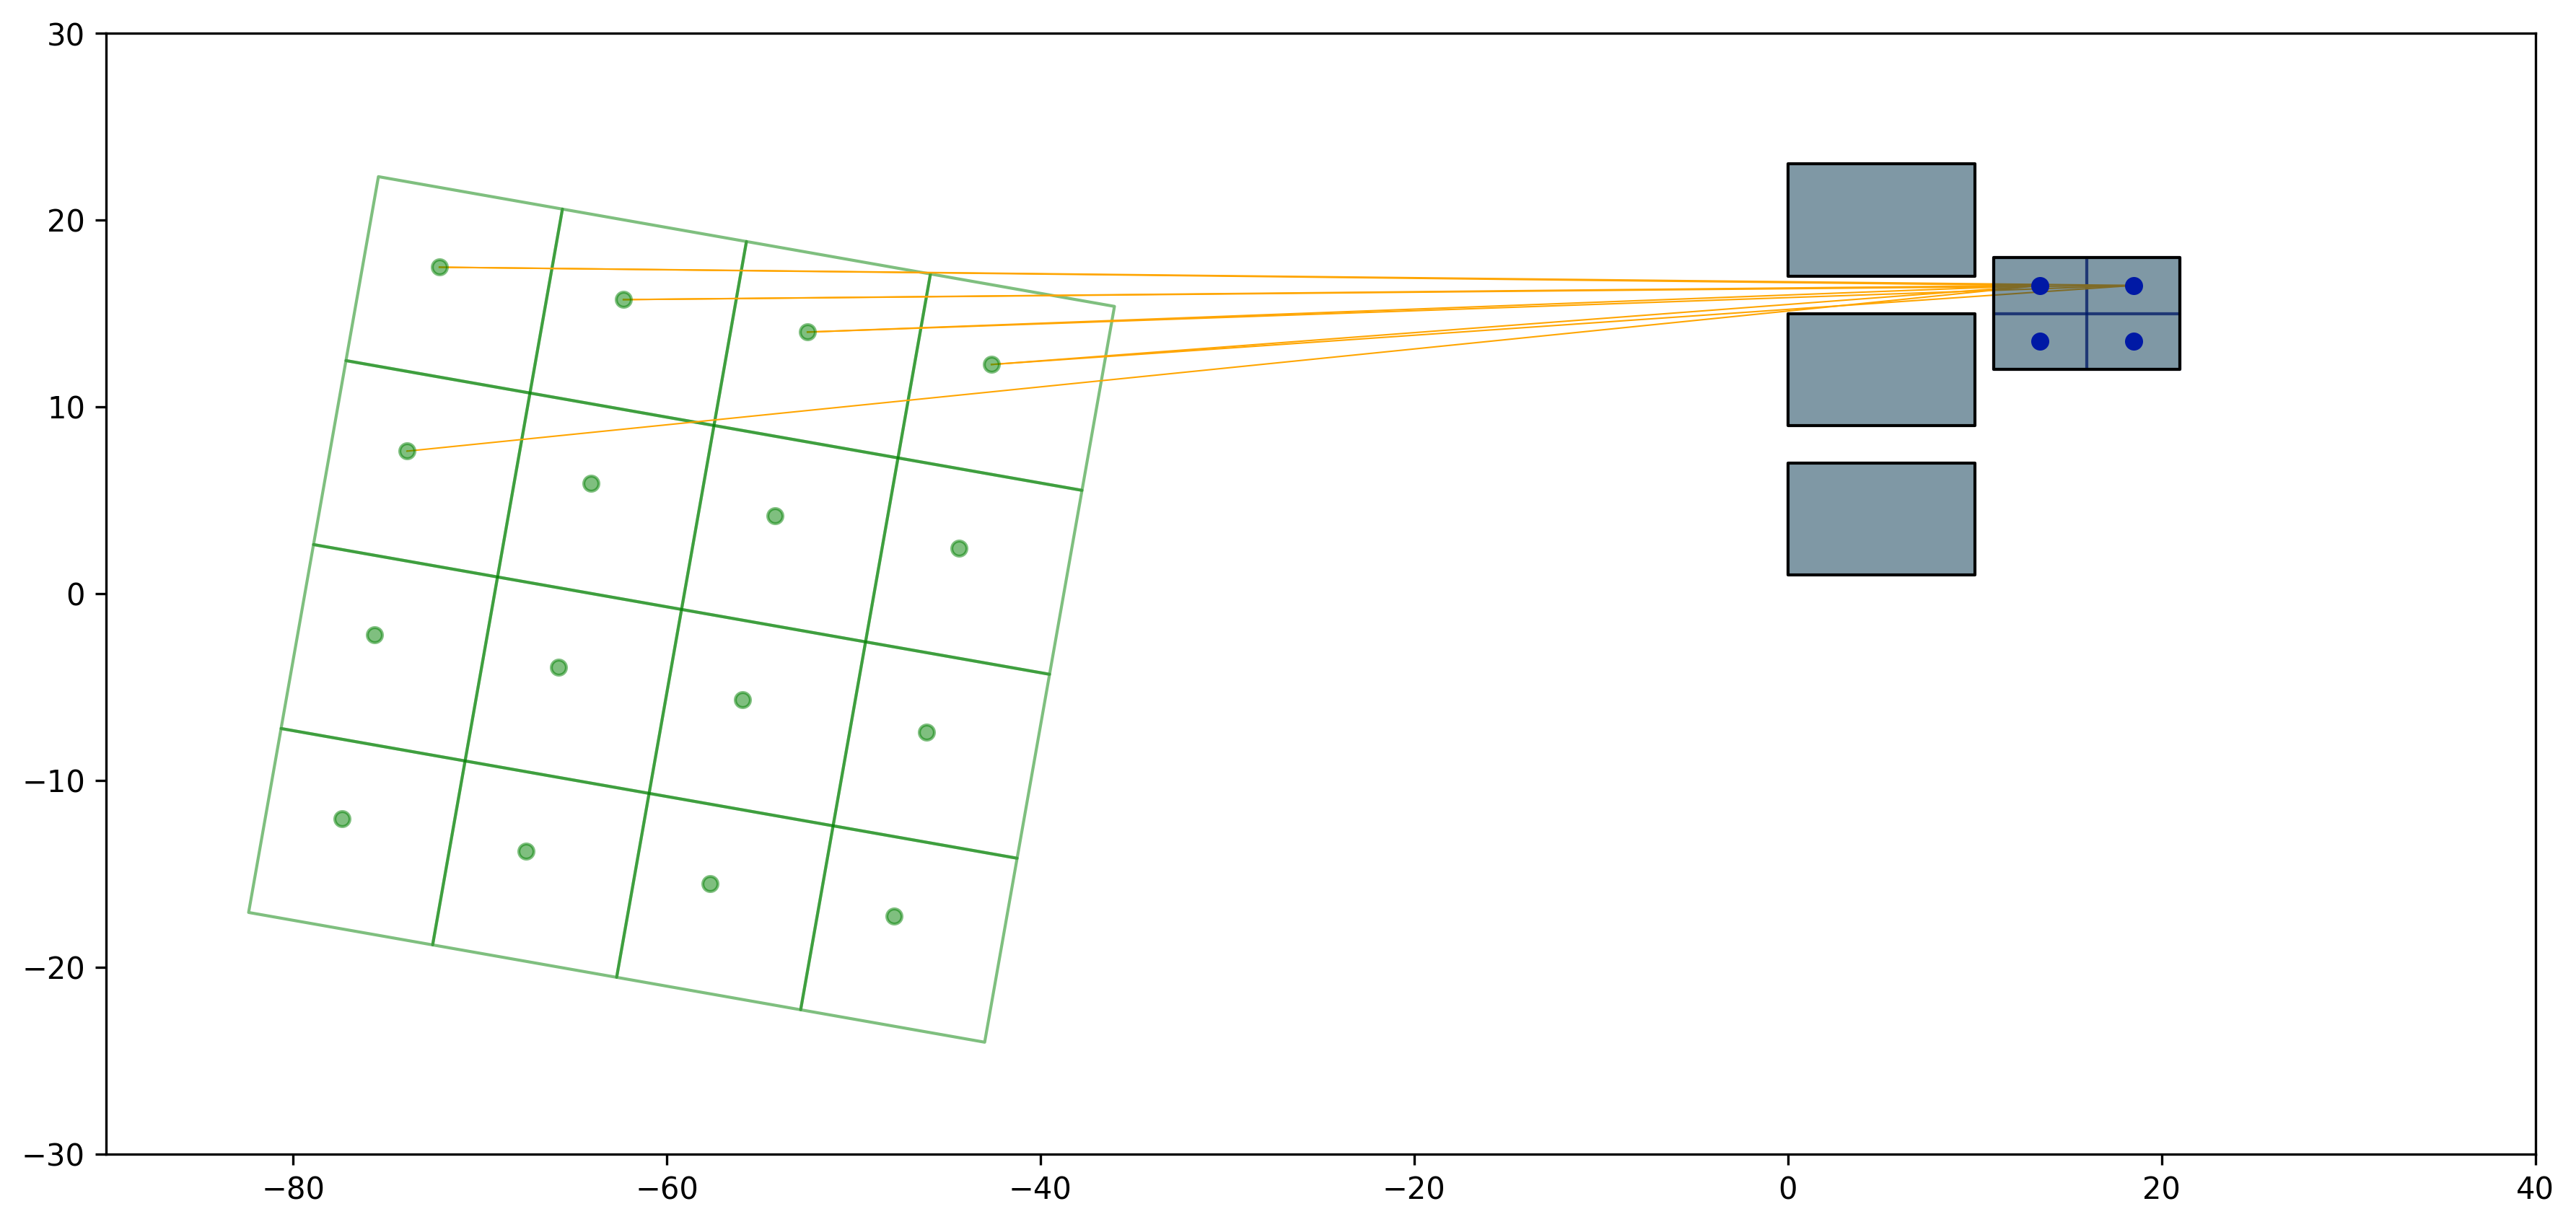

In [20]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
pc = mpl.collections.PatchCollection(
    img_subdiv_list, ec=(0, 0.5, 0, 0.5), fc='none')
pc1 = mpl.collections.PatchCollection(
    det_subdiv_list, ec=(0, 0, 0.5, 0.5), fc='none')
idx = 0
# for pair in abpairs[np.all(ts!=0,axis=0)]:
for pair in abpairs[passIndx]:
    ax.plot(pair[0::3], pair[1::3], ',-', c='orange', ms=10, lw=0.5)
    idx += 1

block_list = [mpl.patches.Rectangle(
    (geom[0], geom[2]), geom[1]-geom[0], geom[3]-geom[2]) for geom in config['det geoms']]
pc2 = mpl.collections.PatchCollection(
    block_list, fc=(0, 0.2, 0.3, 0.5), ec='k', zorder=10)
ax.add_collection(pc2)
ax.plot(pAs[:, 0], pAs[:, 1],
        '.', color=(0, 0.5, 0, 0.5), ms=10)
ax.plot(pBs[:, 0], pBs[:, 1],
        '.', color=(0, 0, 1, 1), ms=10)
# ax.plot(pointA[0], pointA[1], 'r.', ms=20)

pAs_mins = np.min(pAs, axis=0)
pAs_maxs = np.max(pAs, axis=0)
det_mins = np.min(config['det geoms'], axis=0)
det_maxs = np.max(config['det geoms'], axis=0)
# ax.set_xlim(np.min([pAs_mins[0],det_mins[0]])-0.1,
#             np.max([pAs_maxs[0],det_maxs[1]])+0.1)
# ax.set_ylim(np.min([pAs_mins[1],det_mins[2]])-0.1,
#             np.max([pAs_maxs[1],det_maxs[3]])+0.1)

ax.set_xlim(-90, 40)
ax.set_ylim(-30, 30)

ax.add_collection(pc)
ax.add_collection(pc1)
# ax.add_patch(mpl.patches.Rectangle(
#     (pointA-config['mmpvx']*0.5)[:2], config['mmpvx'][0], config['mmpvx'][1], fc='none', ec='r'))

# ax.add_patch(mpl.patches.Rectangle(
#     (cuboid[0]+config['dist'], cuboid[2]), cuboid[1]-cuboid[0], cuboid[3]-cuboid[2], fc='none', ec='b'))

ax.set_aspect('equal')
# for idx in [0, 1]:
#     ax.plot(intersects[:, 0, idx], intersects[:, 1, idx], 'k.', ms=5)
fig.tight_layout()
fig.savefig('intersection-2d_2.png', dpi=300)

In [111]:
def findt_2d_test(geom, abpairs):
    # Case 1: intersects on face x = x_0 or face x = x_1
    # Note that A_x never equals B_x.
    tx0 = (abpairs[:, 0] - geom[0]) / (abpairs[:, 0] - abpairs[:, 3])
    tx1 = (abpairs[:, 0] - geom[1]) / (abpairs[:, 0] - abpairs[:, 3])
    yx0 = tx0 * (abpairs[:, 4] - abpairs[:, 1]) + abpairs[:, 1]
    yx1 = tx1 * (abpairs[:, 4] - abpairs[:, 1]) + abpairs[:, 1]
    condition_x0 = np.all(
        np.array([yx0 > geom[2], yx0 < geom[3], tx0 > 0, tx0 < 1]), axis=0
    )
    condition_x1 = np.all(
        np.array([yx1 > geom[2], yx1 < geom[3], tx1 > 0, tx1 < 1]), axis=0
    )
    # Case 2: intersects on face y = y_0 or face y = y_1
    # Note: we exclude the case when A_y equals B_y
    abpairs_y = abpairs[abpairs[:, 1] != abpairs[:, 4]]
    ty0 = (abpairs_y[:, 1] - geom[2]) / (abpairs_y[:, 1] - abpairs_y[:, 4])
    ty1 = (abpairs_y[:, 1] - geom[3]) / (abpairs_y[:, 1] - abpairs_y[:, 4])
    xy0 = ty0 * (abpairs_y[:, 3] - abpairs_y[:, 0]) + abpairs_y[:, 0]
    xy1 = ty1 * (abpairs_y[:, 3] - abpairs_y[:, 0]) + abpairs_y[:, 0]
    condition_y0 = np.all(
        np.array([xy0 > geom[0], xy0 < geom[1], ty0 > 0, ty0 < 1]), axis=0
    )
    condition_y1 = np.all(
        np.array([xy1 > geom[0], xy1 < geom[1], ty1 > 0, ty1 < 1]), axis=0
    )
    t_sorted = np.sort(np.array(
        [
            np.where(condition_x0, tx0, 0),
            np.where(condition_x1, tx1, 0),
            np.where(condition_y0, ty0, 0),
            np.where(condition_y1, ty1, 0),
        ]
    ).T, axis=1)
    t_count = np.count_nonzero(t_sorted, axis=1)
    print(t_count)
    t_list = np.append(t_sorted, np.ones((abpairs.shape[0], 1)), axis=1)
    mask = np.array([[True, True, False, False, False], [False, False, False, True, True], [False, False, True, True, False], [
        False, True, False, True, False], [True, False, False, True, False]])
    t_mask = mask[t_count]
    return t_list[t_mask].reshape((abpairs.shape[0], 2))

In [112]:
# ts_test = np.array([findt_2d_test(geom, abpairs)
#                    for geom in config['det geoms']])

ts_test = findt_2d_test(config['det geoms'][1], abpairs)
print(ts_test)
# print(np.count_nonzero(ts_test,axis=1))

[2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0]
[[0.8514473  0.96148634]
 [0.8514473  0.94749258]
 [0.82399457 0.91134459]
 [0.80704412 0.91134459]
 [0.84855345 0.96073608]
 [0.84855345 0.91986887]
 [0.80348492 0.90970929]
 [0.80348492 0.90970929]
 [0.84554461 0.95995601]
 [0.         0.        ]
 [0.79979195 0.90801252]
 [0.79979195 0.83091425]
 [0.84241379 0.95914432]
 [0.         0.        ]
 [0.79595752 0.90625075]
 [0.         0.        ]
 [0.83518823 0.95680546]
 [0.83339249 0.95050138]
 [0.83518823 0.90119583]
 [0.78495564 0.90119583]
 [0.82974383 0.95585951]
 [0.82974383 0.92667116]
 [0.78052557 0.8991604 ]
 [0.78052557 0.8991604 ]
 [0.82593178 0.9548712 ]
 [0.82593178 0.85859356]
 [0.77590914 0.89703933]
 [0.77590914 0.85859356]
 [0.82194511 0.95383762]
 [0.         0.        ]
 [0.77109433 0.89482712]
 [0.         0.        ]
 [0.84504323 0.95082936]
 [0.81034181 0.95082936]
 [0.84504323 0.8884

[[0.97249024 0.         0.         0.        ]
 [0.97249024 0.         0.         0.        ]
 [0.         0.         0.94133152 0.        ]
 [0.92177464 0.         0.         0.        ]
 [0.97195434 0.         0.         0.        ]
 [0.97195434 0.         0.         0.        ]
 [0.92033172 0.         0.         0.        ]
 [0.92033172 0.         0.         0.        ]
 [0.97139715 0.         0.         0.        ]
 [0.97139715 0.         0.         0.        ]
 [0.91883457 0.         0.         0.        ]
 [0.91883457 0.         0.         0.        ]
 [0.97081737 0.         0.         0.        ]
 [0.97081737 0.         0.         0.        ]
 [0.91728008 0.         0.         0.        ]
 [0.91728008 0.         0.         0.        ]
 [0.96914676 0.         0.         0.        ]
 [0.96914676 0.         0.         0.        ]
 [0.         0.         0.94506274 0.        ]
 [0.91281985 0.         0.         0.        ]
 [0.96847108 0.         0.         0.        ]
 [0.96847108 

[[0.         0.         0.         0.        ]
 [0.         0.96148634 0.8514473  0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.97249024 0.        ]]
